In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, auc, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso
import sklearn.preprocessing, sklearn.cluster, sklearn.metrics


C:\Users\Petr\AppData\Local\Temp\ipykernel_11132\3931267357.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
column_names = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

df = pd.read_csv('adult.csv', names=column_names)
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48840,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48841,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


1. Popis datasetu a průzkumná analýza

Popis atributů
- **age:** Kontinuální proměnná představující věk jedince.
- **workclass:** Kategorická proměnná s hodnotami jako Private, Self-emp-not-inc, Self-emp-inc, Federal-gov atd.
- **fnlwgt:** Kontinuální proměnná představující finální váhu.
- **education:** Kategorická proměnná s různými úrovněmi vzdělání (např. Bachelors, Some-college, HS-grad).
- **education-num:** Kontinuální proměnná představující počet let vzdělání.
- **marital-status:** Kategorická proměnná s hodnotami jako Married-civ-spouse, Divorced, Never-married atd.
- **occupation:** Kategorická proměnná představující typ zaměstnání (např. Tech-support, Craft-repair, Sales).
- **relationship:** Kategorická proměnná představující vztahový stav jedince (např. Wife, Own-child, Husband).
- **race:** Kategorická proměnná s hodnotami jako White, Asian-Pac-Islander, Amer-Indian-Eskimo atd.
- **sex:** Kategorická proměnná s hodnotami Female a Male.
- **capital-gain:** Kontinuální proměnná představující kapitálové zisky.
- **capital-loss:** Kontinuální proměnná představující kapitálové ztráty.
- **hours-per-week:** Kontinuální proměnná představující počet pracovních hodin týdně.
- **native-country:** Kategorická proměnná s hodnotami jako United-States, Cambodia, England.
- **income:** proměnná s hodnotami >50K a <=50K.

Preprocessing:

První řádek dat má nazvý tabulek (??)

In [3]:
df = df.drop(0)

Kontrola dat zda se v datsetu nevyskytují nějaké anomálie

In [4]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
1,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
2,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
3,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
4,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48838,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48839,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48840,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48841,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Redukování data setu skrz samplování ať klasifikační algoritmy netrvají příliš dlouho

In [5]:
fraction_to_keep = 0.5

df = df.sample(frac=fraction_to_keep, random_state=42)

df.reset_index(drop=True, inplace=True)

print(df.shape)

(24421, 15)


Nejdřívě se podíváme jak vypadají naše parametry v závislosi na proměnné income 

- Nejvýdělečnější skupiny na závislosti na vztahu jsou manželé a manželky
- Většina entit v datasetu jsou bilí a průměřně vydělávají více než ostatni rasy
- Nejvýdelečnější profese jsou exekuční, řemeslnické a odborné profese
- Muži průmerně vydělávají více než ženy
- Většina entit v dataframu pochází z USA

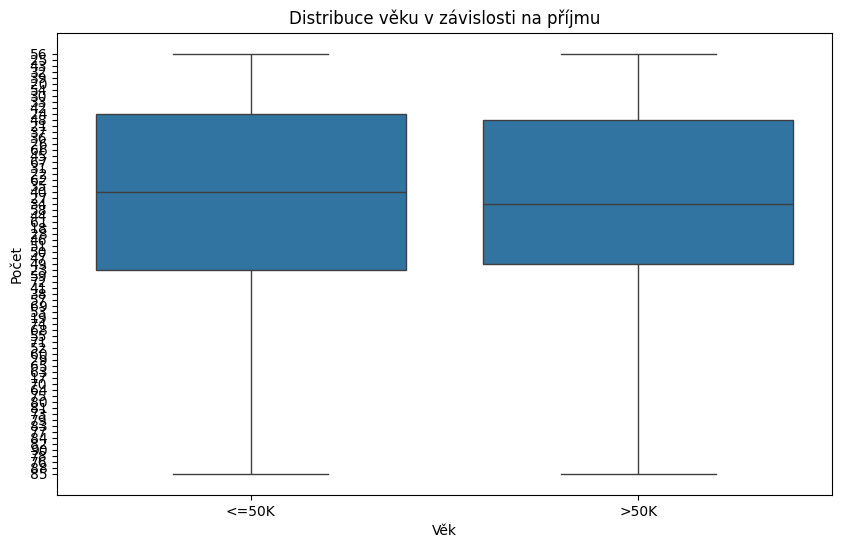

In [6]:
plt.figure(figsize=(10, 6))
#sns.histplot(data=df, x='age', hue='income', multiple='stack', palette='coolwarm', kde=True)
sns.boxplot(data=df, x='income', y='age')
plt.title('Distribuce věku v závislosti na příjmu')
plt.xlabel('Věk')
plt.ylabel('Počet')
plt.show()

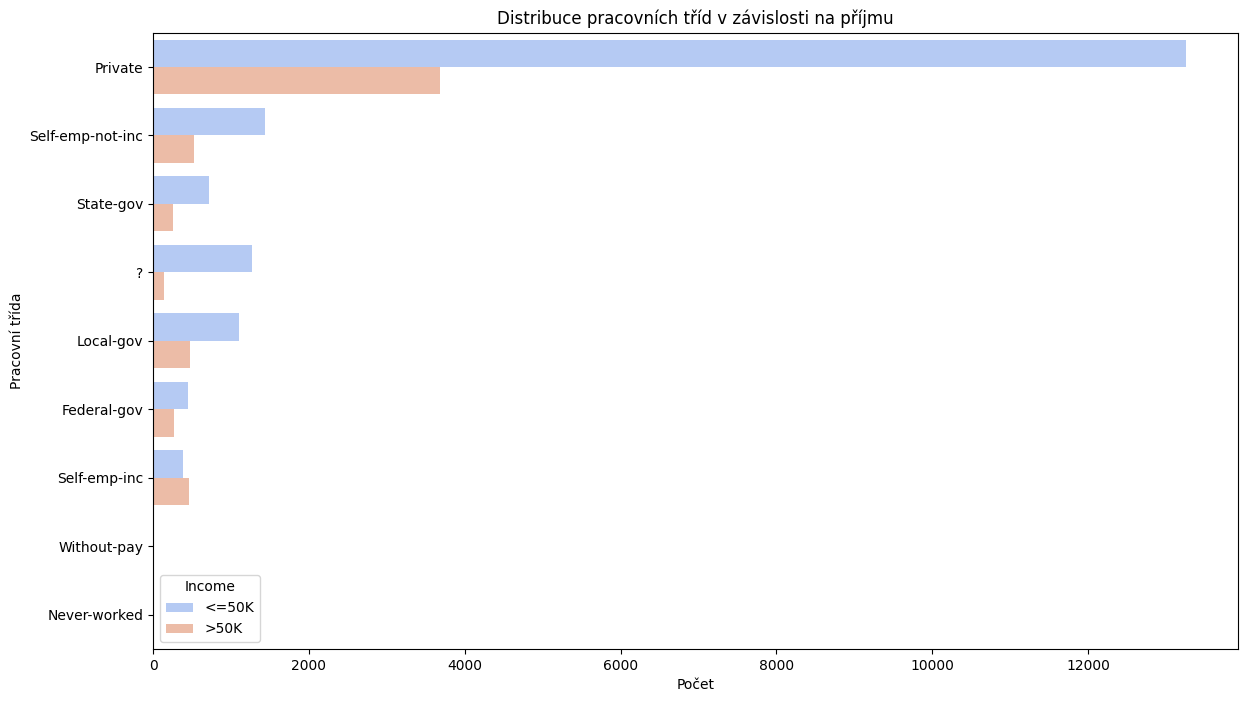

In [7]:
plt.figure(figsize=(14, 8))
sns.countplot(y='workclass', hue='income', data=df, palette='coolwarm')
plt.title('Distribuce pracovních tříd v závislosti na příjmu')
plt.xlabel('Počet')
plt.ylabel('Pracovní třída')
plt.legend(title='Income', labels=['<=50K', '>50K'])
plt.show()

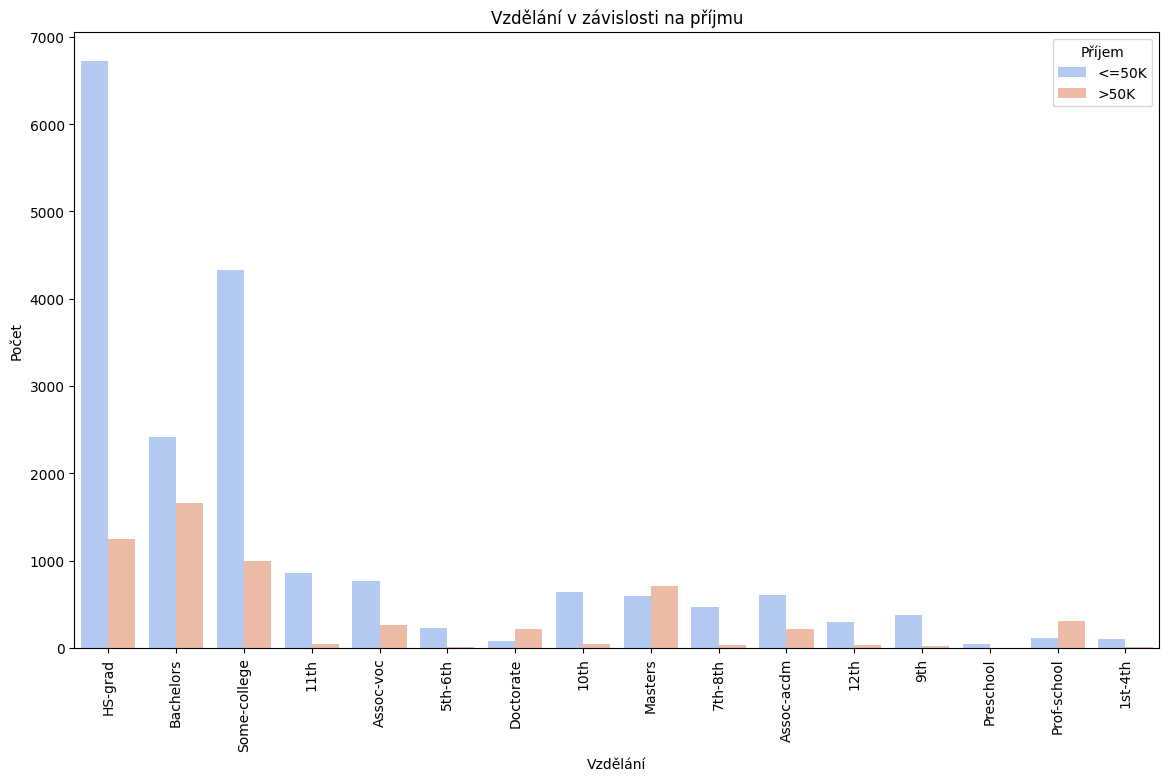

In [8]:
plt.figure(figsize=(14, 8))
sns.countplot(x='education', hue='income', data=df, palette='coolwarm')
plt.title('Vzdělání v závislosti na příjmu')
plt.xlabel('Vzdělání')
plt.ylabel('Počet')
plt.xticks(rotation=90)
plt.legend(title='Příjem', labels=['<=50K', '>50K'])
plt.show()


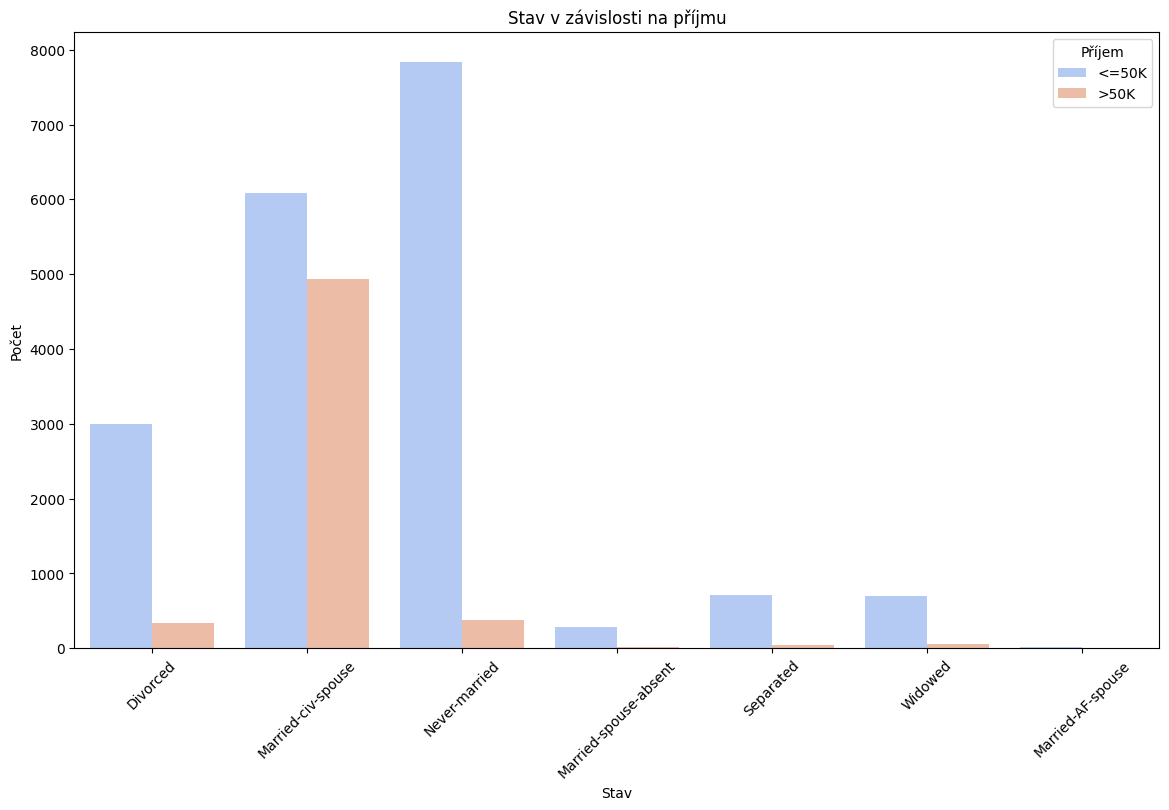

In [9]:
plt.figure(figsize=(14, 8))
sns.countplot(x='marital-status', hue='income', data=df, palette='coolwarm')
plt.title('Stav v závislosti na příjmu')
plt.xlabel('Stav')
plt.ylabel('Počet')
plt.xticks(rotation=45)
plt.legend(title='Příjem', labels=['<=50K', '>50K'])
plt.show()

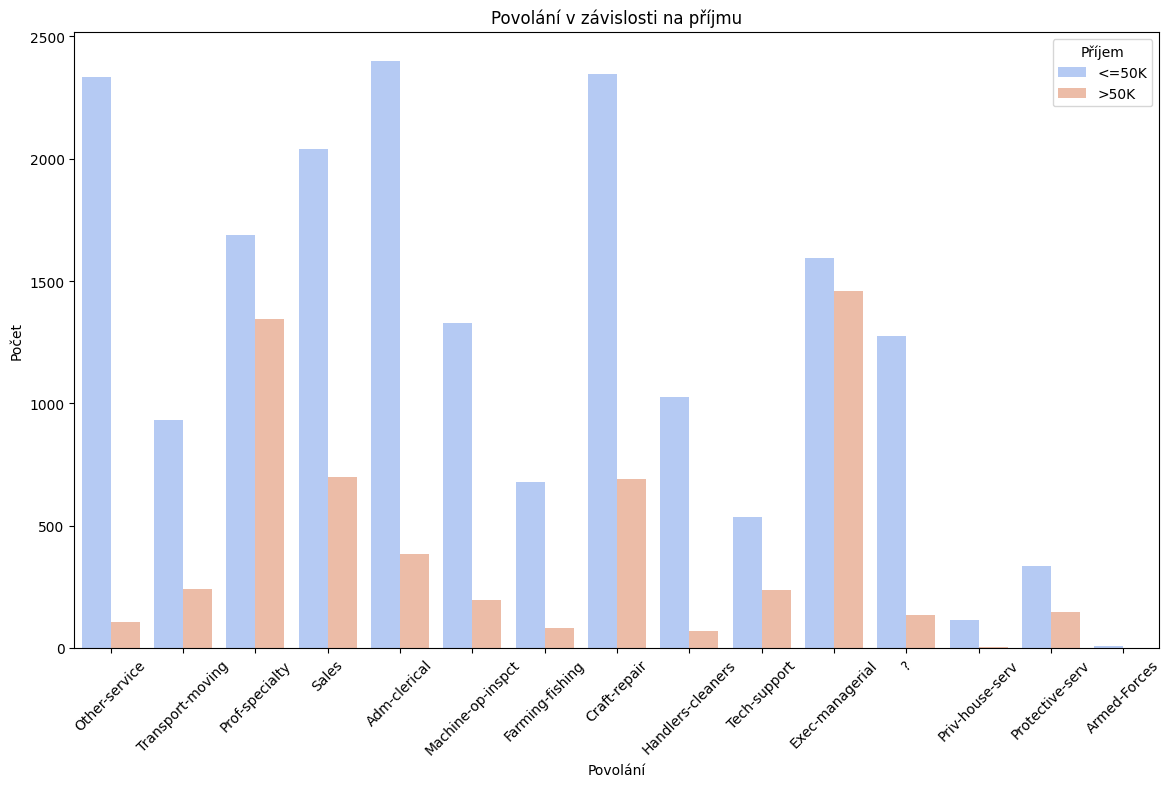

In [10]:
plt.figure(figsize=(14, 8))
sns.countplot(x='occupation', hue='income', data=df, palette='coolwarm')
plt.title('Povolání v závislosti na příjmu')
plt.xlabel('Povolání')
plt.ylabel('Počet')
plt.xticks(rotation=45)
plt.legend(title='Příjem', labels=['<=50K', '>50K'])
plt.show()

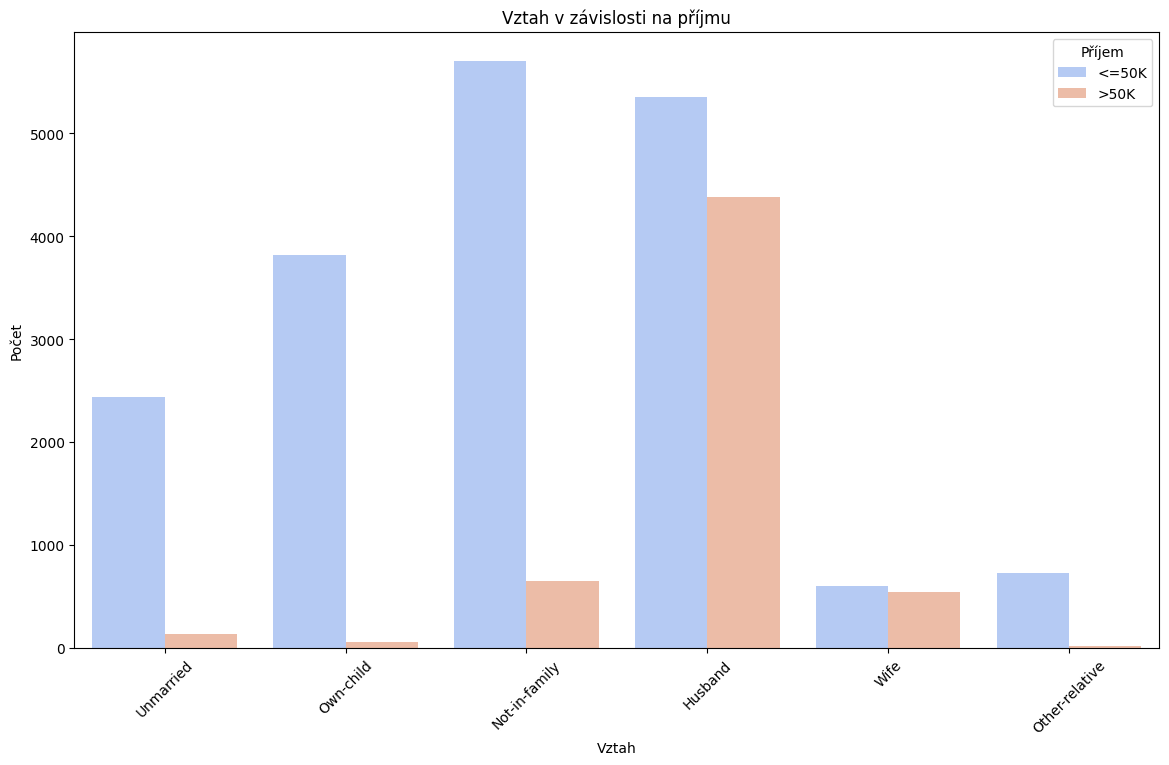

In [11]:
plt.figure(figsize=(14, 8))
sns.countplot(x='relationship', hue='income', data=df, palette='coolwarm')
plt.title('Vztah v závislosti na příjmu')
plt.xlabel('Vztah')
plt.ylabel('Počet')
plt.xticks(rotation=45)
plt.legend(title='Příjem', labels=['<=50K', '>50K'])
plt.show()

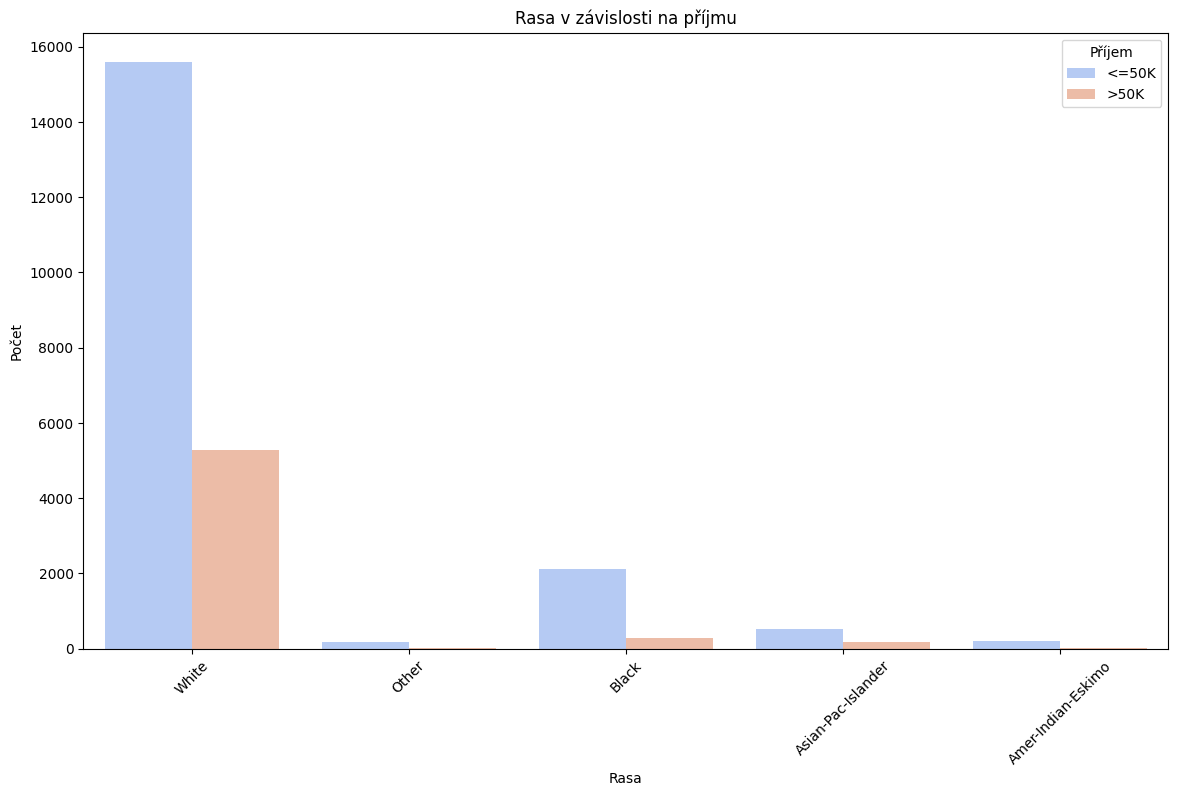

In [12]:
plt.figure(figsize=(14, 8))
sns.countplot(x='race', hue='income', data=df, palette='coolwarm')
plt.title('Rasa v závislosti na příjmu')
plt.xlabel('Rasa')
plt.ylabel('Počet')
plt.xticks(rotation=45)
plt.legend(title='Příjem', labels=['<=50K', '>50K'])
plt.show()

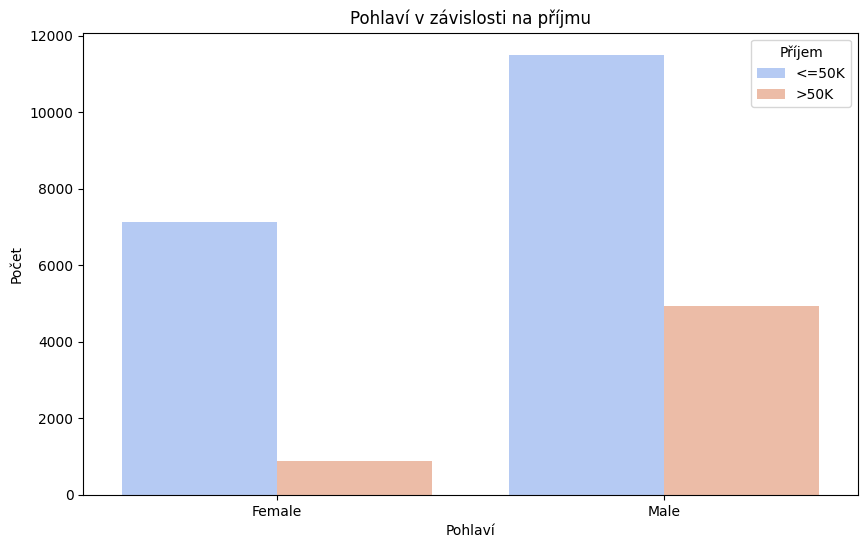

In [13]:
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', hue='income', data=df, palette='coolwarm')
plt.title('Pohlaví v závislosti na příjmu')
plt.xlabel('Pohlaví')
plt.ylabel('Počet')
plt.legend(title='Příjem', labels=['<=50K', '>50K'])
plt.show()

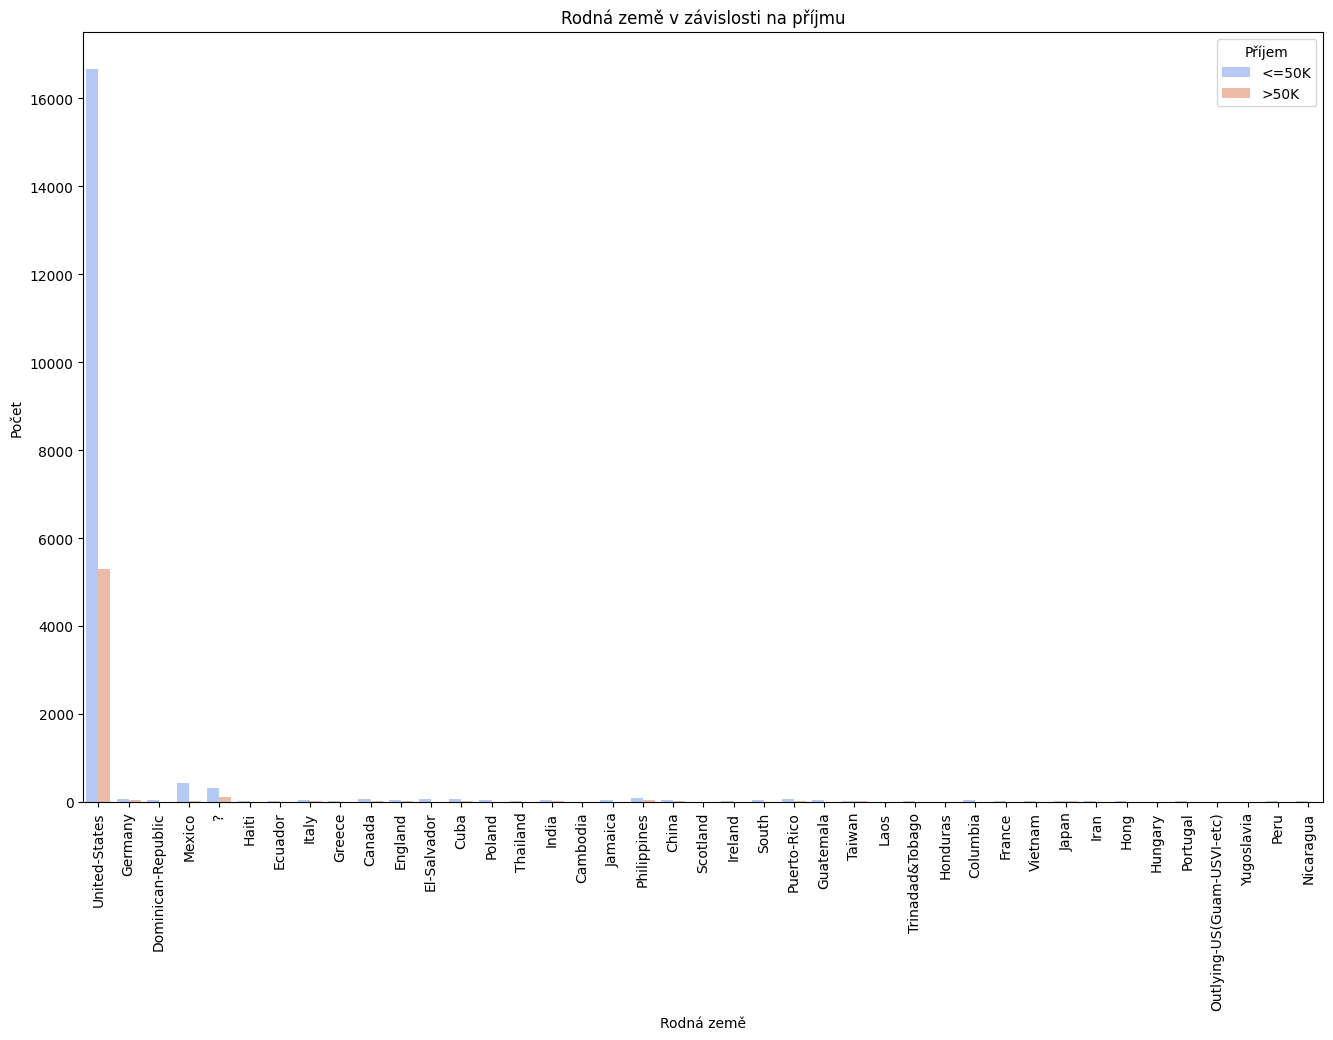

In [14]:
plt.figure(figsize=(16, 10))
sns.countplot(x='native-country', hue='income', data=df, palette='coolwarm')
plt.title('Rodná země v závislosti na příjmu')
plt.xlabel('Rodná země')
plt.ylabel('Počet')
plt.xticks(rotation=90)
plt.legend(title='Příjem', labels=['<=50K', '>50K'])
plt.show()

Dataset mnoho málo používáných hodnot a proto zjednoduším dataset uvedením kontinentů místo samostatných národů

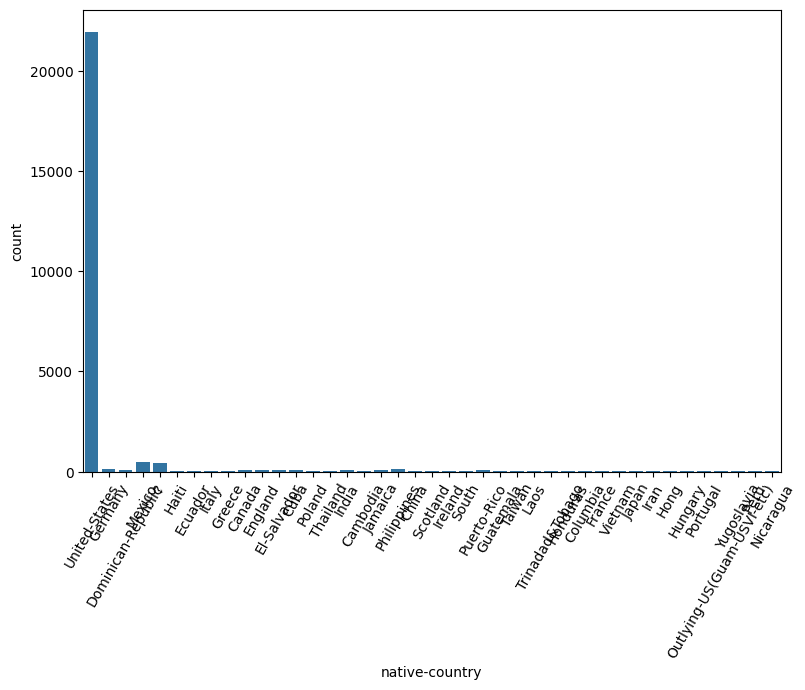

In [15]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=60)
sns.countplot(x='native-country', data=df)
plt.show()

In [16]:
modified_df = df.copy()

Zavedení kontinentu místo země pro redukci kategorií

In [17]:
unique_countries = [
    'United-States', '?', 'Peru', 'Guatemala', 'Mexico', 'Dominican-Republic',
    'Ireland', 'Germany', 'Philippines', 'Thailand', 'Haiti', 'El-Salvador',
    'Puerto-Rico', 'Vietnam', 'South', 'Columbia', 'Japan', 'India', 'Cambodia',
    'Poland', 'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
    'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica', 'Ecuador',
    'Yugoslavia', 'Hungary', 'Hong', 'Greece', 'Trinadad&Tobago',
    'Outlying-US(Guam-USVI-etc)', 'France', 'Holand-Netherlands'
]


country_categories = {
    'North America': ['United-States', 'Canada', 'Mexico'],
    'Europe': ['Germany', 'England', 'Italy', 'Portugal', 'Poland', 'France', 'Holand-Netherlands'],
    'Asia': ['Philippines', 'Thailand', 'Japan', 'India', 'Cambodia', 'Taiwan', 'China', 'Iran', 'Hong'],
    'South America': ['Peru', 'Guatemala', 'Dominican-Republic', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam', 'Columbia', 'Cuba', 'Nicaragua', 'Honduras', 'Ecuador', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'Jamaica'],
    'Other': [country for country in unique_countries if country not in ['United-States', 'Canada', 'Mexico',
                                                                        'Germany', 'England', 'Italy', 'Portugal', 'Poland', 'France', 'Holand-Netherlands',
                                                                        'Philippines', 'Thailand', 'Japan', 'India', 'Cambodia', 'Taiwan', 'China', 'Iran', 'Hong',
                                                                        'Peru', 'Guatemala', 'Dominican-Republic', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam', 'Columbia', 'Cuba', 'Nicaragua', 'Honduras', 'Ecuador', 'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'Jamaica']]
}

# map countries to categories
country_mapping = {country: category for category, countries in country_categories.items() for country in countries}
modified_df['country_category'] = modified_df['native-country'].map(country_mapping).fillna('Other') 


modified_df.drop(columns=['native-country'], inplace=True)

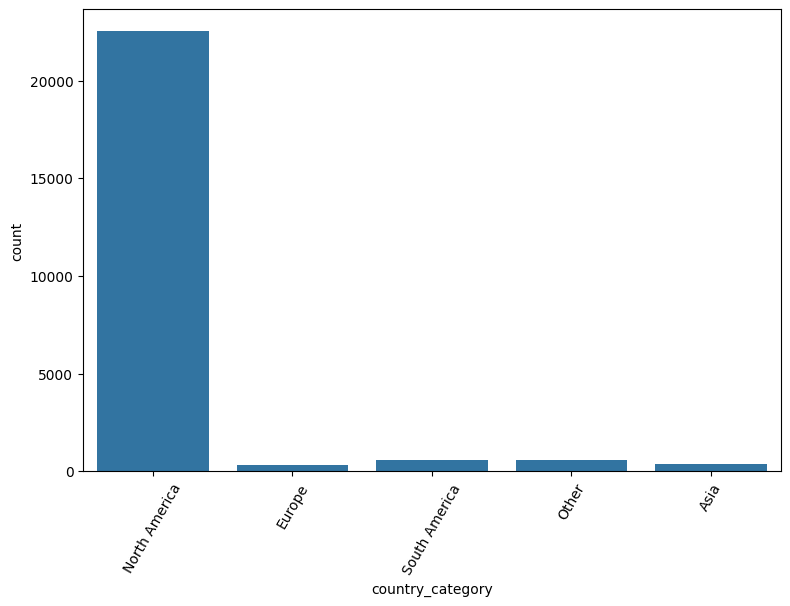

In [18]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=60)
sns.countplot(x='country_category', data=modified_df)
plt.show()

To stejné s věkem

In [19]:

modified_df['age'] = pd.to_numeric(modified_df['age'], errors='coerce')

age_bins = [0, 25, 40, 60, float('inf')]
age_labels = ['young', 'adult', 'middle-aged', 'senior']

modified_df['age_category'] = pd.cut(modified_df['age'], bins=age_bins, labels=age_labels, include_lowest=True)

print(modified_df.head())

   age workclass  fnlwgt  education education-num      marital-status  \
0   56   Private   33115    HS-grad             9            Divorced   
1   25   Private  112847    HS-grad             9  Married-civ-spouse   
2   43   Private  170525  Bachelors            13            Divorced   
3   32   Private  186788    HS-grad             9  Married-civ-spouse   
4   39   Private  277886  Bachelors            13  Married-civ-spouse   

         occupation   relationship   race     sex capital-gain capital-loss  \
0     Other-service      Unmarried  White  Female            0            0   
1  Transport-moving      Own-child  Other    Male            0            0   
2    Prof-specialty  Not-in-family  White  Female        14344            0   
3  Transport-moving        Husband  White    Male            0            0   
4             Sales           Wife  White  Female            0            0   

  hours-per-week income country_category age_category  
0             40  <=50K    Nor

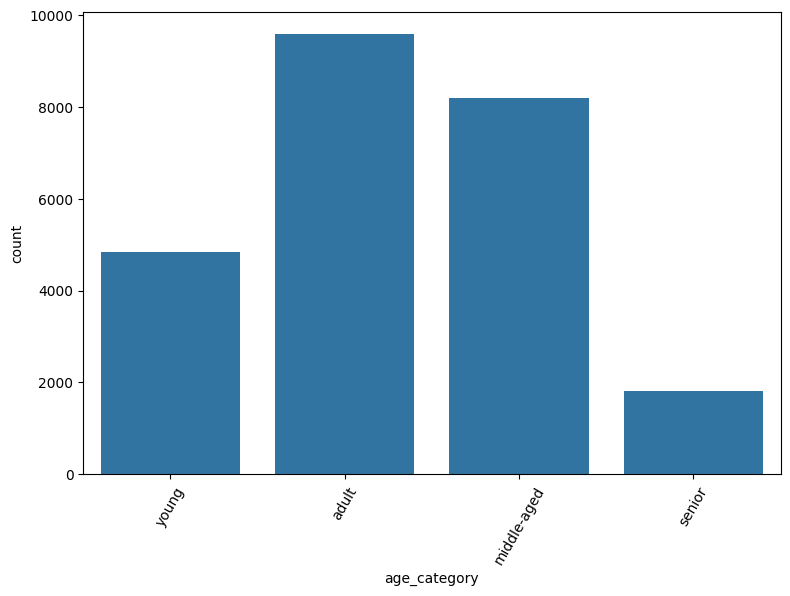

In [20]:
plt.figure(figsize=(9, 6))
plt.xticks(rotation=60)
sns.countplot(x='age_category', data=modified_df)
plt.show()

S existenci education-num sloupec education není potřeba

In [21]:
modified_df.drop(columns=['education'], inplace=True)

One-hot encoding skrz getdummies pro konvertovaní kategorií do numerického formátu

In [22]:
categorical_cols = ['workclass', 'marital-status', 'occupation', 'relationship', 'race','sex', 'country_category', 'age_category']

df_encoded = pd.get_dummies(modified_df, columns=categorical_cols)

In [23]:
df_encoded['income'] = df_encoded['income'].astype(str).apply(lambda x : 1 if x == '>50K' else 0) ## put this higher

In [24]:
df_encoded['income'].value_counts()

income
0    18631
1     5790
Name: count, dtype: int64

Jelikož je model velmi nevyvážený rozhodnul jsem se hodnotit úspěšnost pomocí F1-skóre

In [25]:
X, y = df_encoded.loc[:, df_encoded.columns != 'income'], df_encoded.loc[:, 'income']

In [26]:
df_encoded.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,workclass_Local-gov,...,sex_Male,country_category_Asia,country_category_Europe,country_category_North America,country_category_Other,country_category_South America,age_category_young,age_category_adult,age_category_middle-aged,age_category_senior
0,56,33115,9,0,0,40,0,False,False,False,...,False,False,False,True,False,False,False,False,True,False
1,25,112847,9,0,0,40,0,False,False,False,...,True,False,False,True,False,False,True,False,False,False
2,43,170525,13,14344,0,40,1,False,False,False,...,False,False,False,True,False,False,False,False,True,False
3,32,186788,9,0,0,40,0,False,False,False,...,True,False,False,True,False,False,False,True,False,False
4,39,277886,13,0,0,30,0,False,False,False,...,False,False,False,True,False,False,False,True,False,False


Decision tree:

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [28]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3746
           1       0.62      0.64      0.63      1139

    accuracy                           0.82      4885
   macro avg       0.75      0.76      0.76      4885
weighted avg       0.83      0.82      0.82      4885

Accuracy: 0.8233367451381781


In [29]:
skf = StratifiedKFold(n_splits=10)
scores_dtc = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_dtc.append(f1_score(y_test, y_pred))
    print(f'income ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; income ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')
    
np.mean(scores_dtc), np.min(scores_dtc), np.max(scores_dtc)



income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24


(0.6114200982804415, 0.5625, 0.6387702818104184)

Dále RandomForestClassifier

In [45]:
scores_rfc = list()
skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_rfc.append(f1_score(y_test, y_pred))
    print(f'income ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; income ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')
    
np.mean(scores_rfc), np.min(scores_rfc), np.max(scores_rfc)

income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24


(0.6721363638490122, 0.620817843866171, 0.6994328922495274)

A poslední MLPClassifier

In [31]:
scores_mpl = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_mpl.append(f1_score(y_test, y_pred))
    print(f'income ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; income ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')
    
np.mean(scores_mpl), np.min(scores_mpl), np.max(scores_mpl)


income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24


(0.421398986847496, 0.23845007451564829, 0.6147540983606558)

Zobrazme si výsledky s defaultnímy parametry na grafu. Lze vidět, že nejlépe si vedl RandomForest s průměrnou hodnotou okolo 0.67 a nejhůře MLP s 0.41

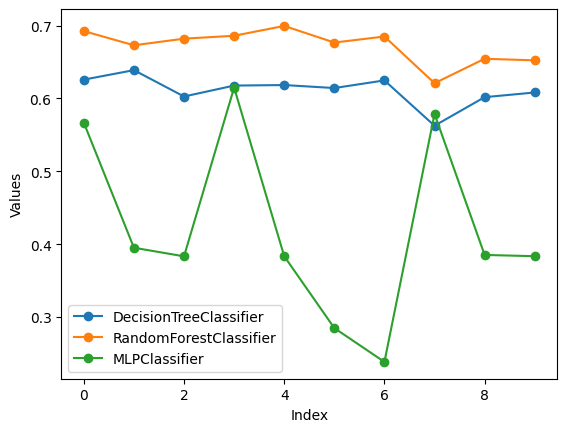

In [32]:
plt.plot(scores_dtc, label='DecisionTreeClassifier', marker='o')
plt.plot(scores_rfc, label='RandomForestClassifier', marker='o')
plt.plot(scores_mpl, label='MLPClassifier', marker='o')

plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

Zkusme tedy upravit některé parametry jestli touto změnou dostaneme lepší výsledky.

In [33]:
scores_global_dtc = list()
iteration = 0
for d in range(2, 20):
    for split in range(2, 20):
        skf = StratifiedKFold(n_splits=10)
        scores = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf = DecisionTreeClassifier(max_depth = d, min_samples_split = split, random_state = 13)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            scores.append(f1_score(y_test, y_pred))
        iteration += 1
        scores_global_dtc.append((d, split, np.mean(scores)))
        print(f'{(iteration/(18*18))*100}% done')

df_res = pd.DataFrame.from_records(scores_global_dtc, columns=['max_depth', 'min_samples_split', 'f1'])
df_res.sort_values(by='f1', ascending=False).head(5)

0.30864197530864196% done
0.6172839506172839% done
0.9259259259259258% done
1.2345679012345678% done
1.5432098765432098% done
1.8518518518518516% done
2.1604938271604937% done
2.4691358024691357% done
2.7777777777777777% done
3.0864197530864197% done
3.3950617283950617% done
3.7037037037037033% done
4.012345679012346% done
4.320987654320987% done
4.62962962962963% done
4.938271604938271% done
5.246913580246913% done
5.555555555555555% done
5.864197530864197% done
6.172839506172839% done
6.481481481481481% done
6.790123456790123% done
7.098765432098765% done
7.4074074074074066% done
7.716049382716049% done
8.024691358024691% done
8.333333333333332% done
8.641975308641975% done
8.950617283950617% done
9.25925925925926% done
9.5679012345679% done
9.876543209876543% done
10.185185185185185% done
10.493827160493826% done
10.802469135802468% done
11.11111111111111% done
11.419753086419753% done
11.728395061728394% done
12.037037037037036% done
12.345679012345679% done
12.654320987654321% don

,max_depth,min_samples_split,f1
176,11,16,0.674889
177,11,17,0.674459
174,11,14,0.674162
178,11,18,0.674038
179,11,19,0.673972


In [34]:
skf = StratifiedKFold(n_splits=10)
scores_dtc = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = DecisionTreeClassifier(max_depth = 11, min_samples_split = 16, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_dtc.append(f1_score(y_test, y_pred))

np.mean(scores_dtc), np.min(scores_dtc), np.max(scores_dtc)

(0.6635603077613351, 0.6115241635687733, 0.6802973977695167)

Zde vidíme zlepšení v průměru o 0.05 oproti původnímu testování

Dále zkusíme RandomForestClassifier

In [35]:
scores_global_rf = list()
iteration = 0
for n_estimators in [50, 100, 200]:
    for max_depth in range(5, 16):
        skf = StratifiedKFold(n_splits=10)
        scores = []
        for train_index, test_index in skf.split(X, y):
            X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=13)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            scores.append(f1_score(y_test, y_pred))
        iteration += 1
        scores_global_rf.append((n_estimators, max_depth, np.mean(scores)))
        print(f'{(iteration/(3*11))*100:.2f}% done')

df_res_rf = pd.DataFrame.from_records(scores_global_rf, columns=['n_estimators', 'max_depth', 'f1'])
df_res_rf.sort_values(by='f1', ascending=False).head(5)

3.03% done
6.06% done
9.09% done
12.12% done
15.15% done
18.18% done
21.21% done
24.24% done
27.27% done
30.30% done
33.33% done
36.36% done
39.39% done
42.42% done
45.45% done
48.48% done
51.52% done
54.55% done
57.58% done
60.61% done
63.64% done
66.67% done
69.70% done
72.73% done
75.76% done
78.79% done
81.82% done
84.85% done
87.88% done
90.91% done
93.94% done
96.97% done
100.00% done


,n_estimators,max_depth,f1
32,200,15,0.681927
21,100,15,0.681635
10,50,15,0.678112
20,100,14,0.676451
19,100,13,0.676043


In [47]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=13)

scores_rfc = list()
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = RandomForestClassifier(n_estimators = 200, max_depth = 15, random_state = 13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_rfc.append(f1_score(y_test, y_pred))

np.mean(scores_dtc), np.min(scores_dtc), np.max(scores_dtc)

(0.6635603077613351, 0.6115241635687733, 0.6802973977695167)

Zde po zavedení parametrů neproběhly zásadní změny a průměrný výsledek se změnil pouze o 0.005.

In [37]:
scores_global_mlp = list()
i = 0
hidden_layer_sizes = [(50,), (100,), (50, 50)]
activations = ['tanh', 'relu']
alphas = [0.0001, 0.001, 0.01]

total_iterations = len(hidden_layer_sizes) * len(activations) * len(alphas)

for hls in hidden_layer_sizes:
    for activation in activations:
        for alpha in alphas:
            kf = KFold(n_splits=5)
            scores = []
            for train_index, test_index in kf.split(X, y):
                X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
                y_train, y_test = y.iloc[train_index], y.iloc[test_index]
                clf = MLPClassifier(hidden_layer_sizes=hls, activation=activation, alpha=alpha, max_iter=1000, random_state=13)
                clf.fit(X_train, y_train)
                y_pred = clf.predict(X_test)
                scores.append(f1_score(y_test, y_pred))
            i += 1
            scores_global_mlp.append((hls, activation, alpha, np.mean(scores)))
            print(f'{(i/total_iterations)*100:.2f}% done')

df_res_mlp = pd.DataFrame.from_records(scores_global_mlp, columns=['hidden_layer_sizes', 'activation', 'alpha', 'f1'])
df_res_mlp.sort_values(by='f1', ascending=False).head(5)

5.56% done
11.11% done
16.67% done
22.22% done
27.78% done
33.33% done
38.89% done
44.44% done
50.00% done
55.56% done
61.11% done
66.67% done
72.22% done
77.78% done
83.33% done
88.89% done
94.44% done
100.00% done


,hidden_layer_sizes,activation,alpha,f1
10,"(100,)",relu,0.0010,0.402235
17,"(50, 50)",relu,0.0100,0.395611
11,"(100,)",relu,0.0100,0.386669
15,"(50, 50)",relu,0.0001,0.377941
3,"(50,)",relu,0.0001,0.370916


Konfigurace parametrů nezpůsobila žádné změny v F1 skoré.

In [44]:
scores_mpl = list()
skf = StratifiedKFold(n_splits=10)
for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf = MLPClassifier(hidden_layer_sizes=100, activation='relu', alpha=0.0001, max_iter=1000, random_state=13)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    scores_mpl.append(f1_score(y_test, y_pred))
    print(f'income ratio in train set: {y_train.value_counts(normalize=True)[1]:.2}; income ratio in test set: {y_test.value_counts(normalize=True)[1]:.2}')
    
np.mean(scores_mpl), np.min(scores_mpl), np.max(scores_mpl)

income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24
income ratio in train set: 0.24; income ratio in test set: 0.24


(0.421398986847496, 0.23845007451564829, 0.6147540983606558)

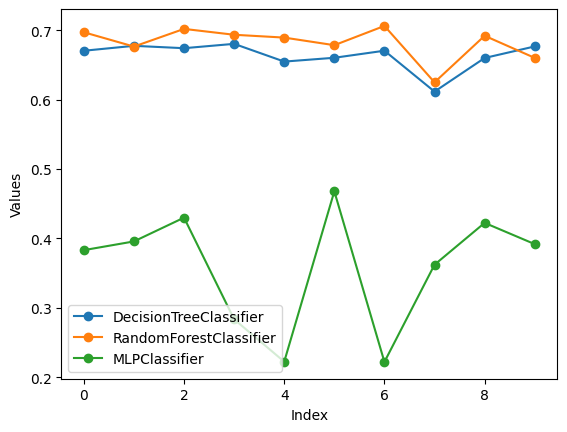

In [39]:
plt.plot(scores_dtc, label='DecisionTreeClassifier', marker='o')
plt.plot(scores_rfc, label='RandomForestClassifier', marker='o')
plt.plot(scores_mpl, label='MLPClassifier', marker='o')

plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

Záver:
- Překvapilo mě jak relativně malé jsou změny parametrů na F1 skóre. Větší konfigurace parametrů by nejšpíš přinesla lepší změny. Taktéž mě překvapilo jak velké odchylky jsou při použití MLPClassifieru.
- Zklamalo a překvapilo mě jak moc špatně si vedl MLPClassifier oproti ostatním zkoušeným.
- Po konfiguraci parametrů se vyrovnalo průměrné skóre RandomForestu a DecisionTree